In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [3]:
import keras
from keras.applications.mobilenet import MobileNet
from sklearn.metrics import confusion_matrix
from keras.metrics import categorical_crossentropy
from keras.metrics import binary_crossentropy
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
from keras.preprocessing import image

In [4]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip = True,
)
validation_datagen = image.ImageDataGenerator(
    rescale = 1./255
)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Tomato leaf /Tomato Leaf Deasise Dataset/train',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

validation = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Tomato leaf /Tomato Leaf Deasise Dataset/val',
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

test = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/Tomato leaf /Tomato Leaf Deasise Dataset/test',
    target_size = (224, 224),
    batch_size = 32,
    shuffle = False,
    class_mode = 'categorical'
)

Found 7560 images belonging to 9 classes.
Found 1080 images belonging to 9 classes.
Found 2160 images belonging to 9 classes.


In [7]:
VGG16 = tf.keras.applications.VGG16(
    include_top=False,
    weights = 'imagenet',
    input_shape=(224,224,3),
    )

58889256/58889256 [==============================] - 1s 0us/step


In [8]:
VGG16.trainable = False

In [10]:
model = tf.keras.models.Sequential([
  VGG16,
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.8),
  tf.keras.layers.Dense(units=1024, activation='relu'),
  tf.keras.layers.Dense(units=512, activation='relu'),
  tf.keras.layers.Dense(units=9, activation='softmax'),
])

In [11]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dropout_1 (Dropout)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 1024)              25691136  
                                                                 
 dense_4 (Dense)             (None, 512)               524800    
                                                                 
 dense_5 (Dense)             (None, 9)                 4617      
                                                                 
Total params: 40935241 (156.16 MB)
Trainable params: 2

In [12]:
history = model.fit(
    x = train,
    validation_data = validation,
    epochs = 5
)

Epoch 1/5
237/237 [==============================] - 2851s 12s/step - loss: 1.5105 - accuracy: 0.5008 - val_loss: 0.7305 - val_accuracy: 0.7602
Epoch 2/5
237/237 [==============================] - 153s 647ms/step - loss: 0.9799 - accuracy: 0.6574 - val_loss: 0.6932 - val_accuracy: 0.7685
Epoch 3/5
237/237 [==============================] - 156s 660ms/step - loss: 0.8605 - accuracy: 0.6987 - val_loss: 0.6022 - val_accuracy: 0.7861
Epoch 4/5
237/237 [==============================] - 156s 657ms/step - loss: 0.7938 - accuracy: 0.7230 - val_loss: 0.6168 - val_accuracy: 0.8083
Epoch 5/5
237/237 [==============================] - 155s 655ms/step - loss: 0.7389 - accuracy: 0.7413 - val_loss: 0.6322 - val_accuracy: 0.7963


In [13]:
# Evaluate the loss and accuracy
loss, accuracy = model.evaluate(test)

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

68/68 [==============================] - 746s 11s/step - loss: 0.6197 - accuracy: 0.7657
Accuracy: 0.7657407522201538
Loss: 0.6196807026863098


In [14]:
test.class_indices

{'Bacterial_spot': 0,
 'Early_blight': 1,
 'Healthy': 2,
 'Late_blight': 3,
 'Leaf_Mold': 4,
 'Septoria_leaf_spot': 5,
 'Target_Spot': 6,
 'Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato_mosaic_virus': 8}

In [16]:
import numpy as np
from sklearn import metrics

predictions = model.predict(test)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test.classes
class_labels = ['Bacterial_spot', 'Early_blight', 'Healthy', 'Late_blight', 'Leaf_Mold', 'Septoria_leaf_spot', 'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

68/68 [==============================] - 37s 550ms/step
                               precision    recall  f1-score   support

               Bacterial_spot       0.68      0.98      0.81       240
                 Early_blight       0.88      0.30      0.45       240
                      Healthy       0.76      0.97      0.85       240
                  Late_blight       0.64      0.85      0.73       240
                    Leaf_Mold       0.78      0.74      0.76       240
           Septoria_leaf_spot       0.99      0.43      0.60       240
                  Target_Spot       0.76      0.68      0.72       240
Tomato_Yellow_Leaf_Curl_Virus       0.91      0.93      0.92       240
          Tomato_mosaic_virus       0.77      1.00      0.87       240

                     accuracy                           0.77      2160
                    macro avg       0.80      0.77      0.75      2160
                 weighted avg       0.80      0.77      0.75      2160



<Axes: >

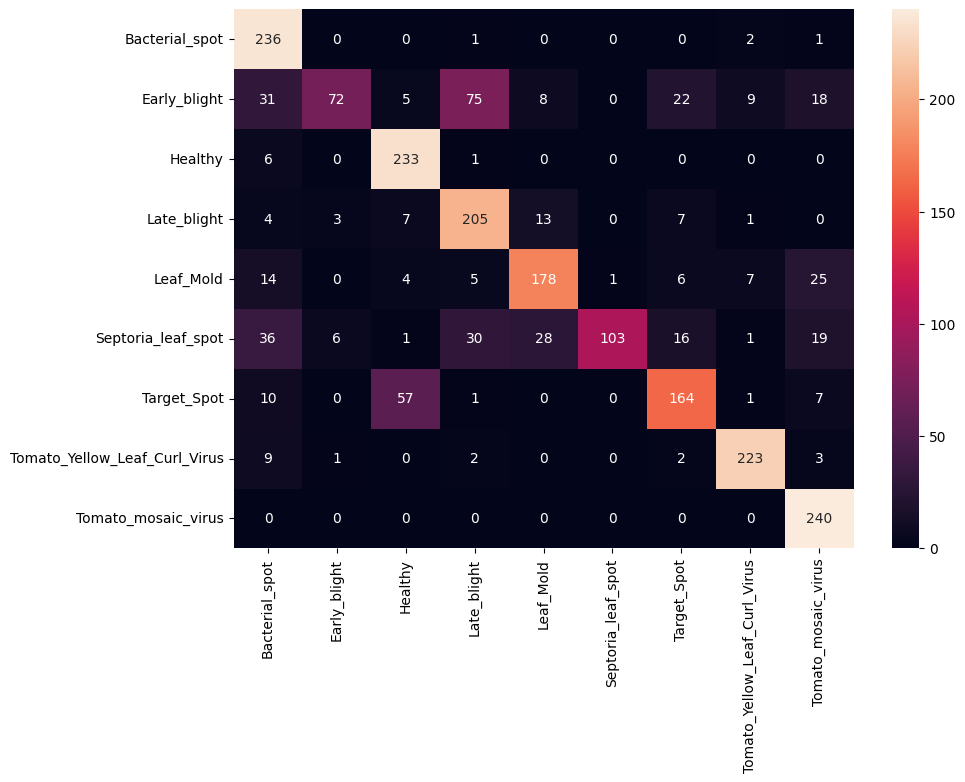

In [19]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in  ['Bacterial_spot', 'Early_blight', 'Healthy', 'Late_blight', 'Leaf_Mold', 'Septoria_leaf_spot', 'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus']],
                  columns = [i for i in  ['Bacterial_spot', 'Early_blight', 'Healthy', 'Late_blight', 'Leaf_Mold', 'Septoria_leaf_spot', 'Target_Spot', 'Tomato_Yellow_Leaf_Curl_Virus', 'Tomato_mosaic_virus']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

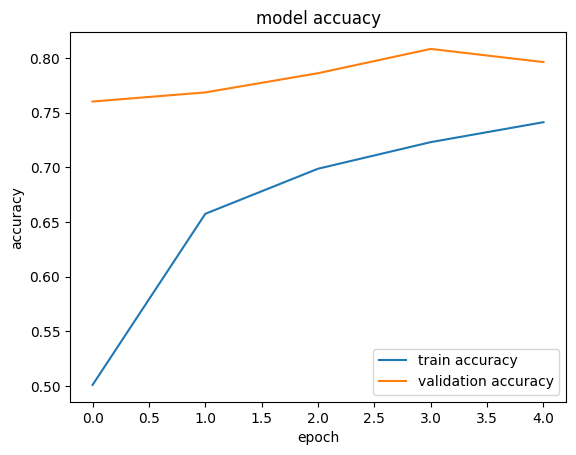

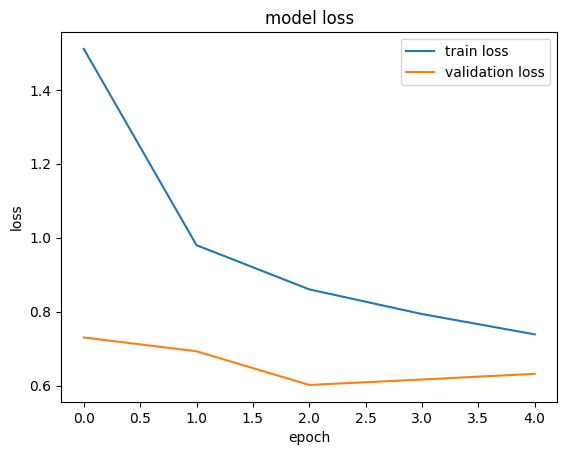

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()